# RF for IQC

In [1]:
# Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
veriler_0 = pd.read_excel(r'/Users/hikmetcancubukcu/Desktop/IQCAI_2/train datasets IQCAI/IQCAI_0sd_sonuc_16000.xlsx')

In [4]:
veriler_1 = pd.read_excel(r'/Users/hikmetcancubukcu/Desktop/IQCAI_2/train datasets IQCAI/IQCAI_0_4sd_sonuc_025interval.xlsx')

In [5]:
columns_v1= ['1_2sU', '1_2sD', '1_3sU', '1_3sD', '2_2sU', '2_2sD', 'R_4s', '4_1sD',
       '4_1sU', '10xD', '10xU', '8xD', '8xU', '12xD', '12xU', 'ewma_02_D',
       'ewma_02_U', 'ewma_01_D', 'ewma_01_U', 'ewma_005_D', 'ewma_005_U',
       'cusum_s_D', 'cusum_s_U', 'results', 'error']

In [6]:
veriler_1 = veriler_1.tail(16000)

In [7]:
veriler_1

,1_2sU,1_2sD,1_3sU,1_3sD,2_2sU,2_2sD,R_4s,4_1sD,4_1sU,10xD,...,ewma_02_D,ewma_02_U,ewma_01_D,ewma_01_U,ewma_005_D,ewma_005_U,cusum_s_D,cusum_s_U,results,error
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.563089,0.25
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.439752,0.25
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.449232,0.25
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.503208,0.25
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.580667,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,4.721477,4.00
16996,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,4.677162,4.00
16997,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,4.684726,4.00
16998,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,4.735832,4.00


In [8]:
veriler_0

,1_2sU,1_2sD,1_3sU,1_3sD,2_2sU,2_2sD,R_4s,4_1sD,4_1sU,10xD,...,ewma_02_D,ewma_02_U,ewma_01_D,ewma_01_U,ewma_005_D,ewma_005_U,cusum_s_D,cusum_s_U,results,error
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.382298,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.470156,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.460696,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.502527,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.504434,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.411489,0
15996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.428572,0
15997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.413048,0
15998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.443683,0


In [9]:
veri_combined = pd.concat([veriler_0, veriler_1], axis=0)

In [10]:
veri_combined

,1_2sU,1_2sD,1_3sU,1_3sD,2_2sU,2_2sD,R_4s,4_1sD,4_1sU,10xD,...,ewma_02_D,ewma_02_U,ewma_01_D,ewma_01_U,ewma_005_D,ewma_005_U,cusum_s_D,cusum_s_U,results,error
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.382298,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.470156,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.460696,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.502527,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.504434,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,4.721477,4.0
16996,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,4.677162,4.0
16997,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,4.684726,4.0
16998,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,4.735832,4.0


In [11]:
# error adjustment

conditions = [
    (veri_combined['error']==0),
    (veri_combined['error']> 0)
    ]

values = [0, 1]

In [12]:
# new column : error_status

veri_combined['error_status'] = np.select(conditions, values)

## data selection

In [13]:
veri_combined.columns

Index(['1_2sU', '1_2sD', '1_3sU', '1_3sD', '2_2sU', '2_2sD', 'R_4s', '4_1sD',
       '4_1sU', '10xD', '10xU', '8xD', '8xU', '12xD', '12xU', 'ewma_02_D',
       'ewma_02_U', 'ewma_01_D', 'ewma_01_U', 'ewma_005_D', 'ewma_005_U',
       'cusum_s_D', 'cusum_s_U', 'results', 'error', 'error_status'],
      dtype='object')

In [14]:
selected_columns = ['1_2sU', '1_3sU',  '2_2sU',  'R_4s', 
       '4_1sU',  '10xU',  '8xU',  '12xU',
       'ewma_02_U',  'ewma_01_U',  'ewma_005_U',
        'cusum_s_U', 'results', 'error', 'error_status']

In [15]:
selected_columns_train_v1 = ['1_2sU', '1_3sU',  '2_2sU',  'R_4s', 
       '4_1sU',  '10xU',  '8xU',  '12xU',
       'ewma_02_U',  'ewma_01_U',  'ewma_005_U',
        'cusum_s_U', 'results']

In [16]:
selected_columns_train_v2 = ['1_2sU', '1_3sU',  '2_2sU',  'R_4s', 
       '4_1sU',  '10xU',  '8xU',  '12xU',
       'ewma_02_U',  'ewma_01_U',  'ewma_005_U',
        'cusum_s_U']

In [17]:
selected_columns_test_v1 = ['error'] # actual error

In [18]:
selected_columns_test_v2 = ['error_status'] # 0,1

In [19]:
# data preprocessing

X = veri_combined.loc[:,selected_columns_train_v2].values
Y = veri_combined.loc[:,selected_columns_test_v2].values

In [20]:
"""verilerin egitim ve test icin bolunmesi"""
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=0)

In [21]:
"""verilerin olceklenmesi"""
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)



## Confusion Matrix

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure( dpi=300)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Youden

In [26]:
def cutoff_youdens_j(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

# Random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=200,criterion="entropy")

In [29]:
rfc.fit(X_train,np.ravel(y_train,order='C'))
yhat= rfc.predict(X_test)

yhat7 = yhat # rf prediction => yhat7

Confusion matrix, without normalization
[[2949  255]
 [  15 3181]]


<Figure size 432x288 with 0 Axes>

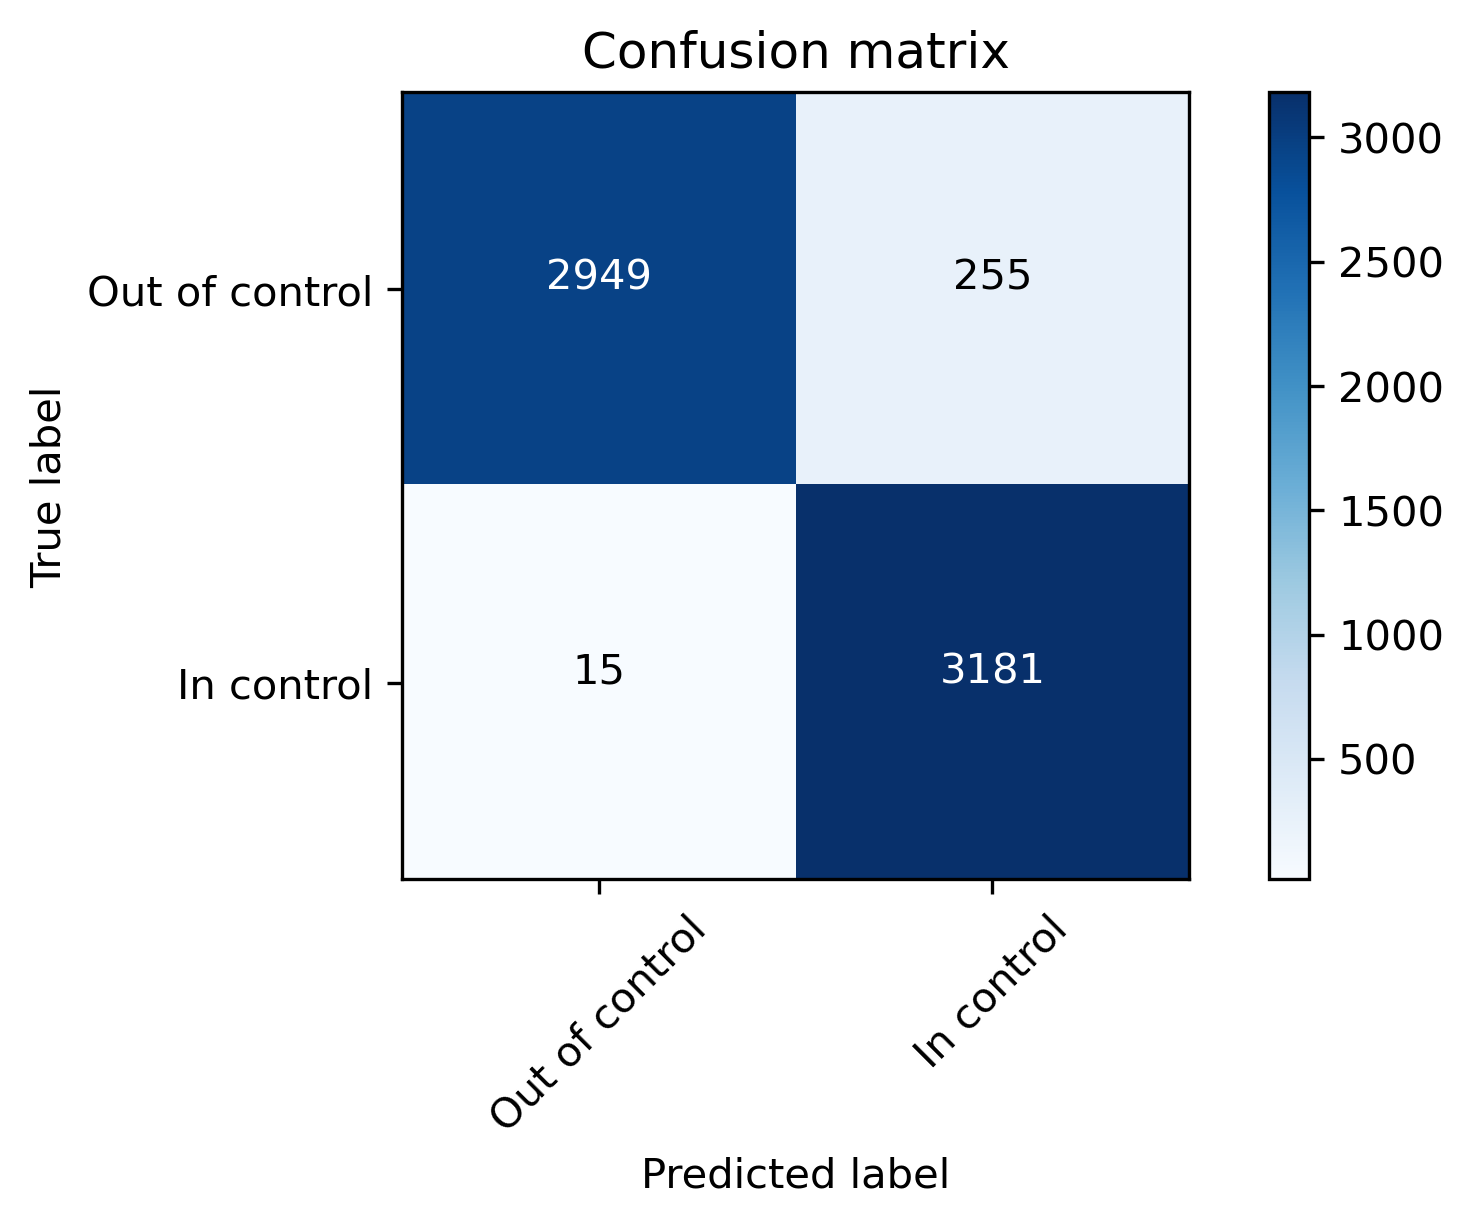

In [30]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Out of control','In control'],normalize= False,  title='Confusion matrix')

In [31]:
# 10 fold cross validation

from sklearn.model_selection import cross_val_score
''' 
1. estimator : classifier (bizim durum)
2. X
3. Y
4. cv : kaç katlamalı

'''
basari = cross_val_score(estimator = rfc, X=X_train, y=np.ravel(y_train,order='C') , cv = 10)
print(basari.mean())
print(basari.std())

0.95796875
0.0023837728597488027


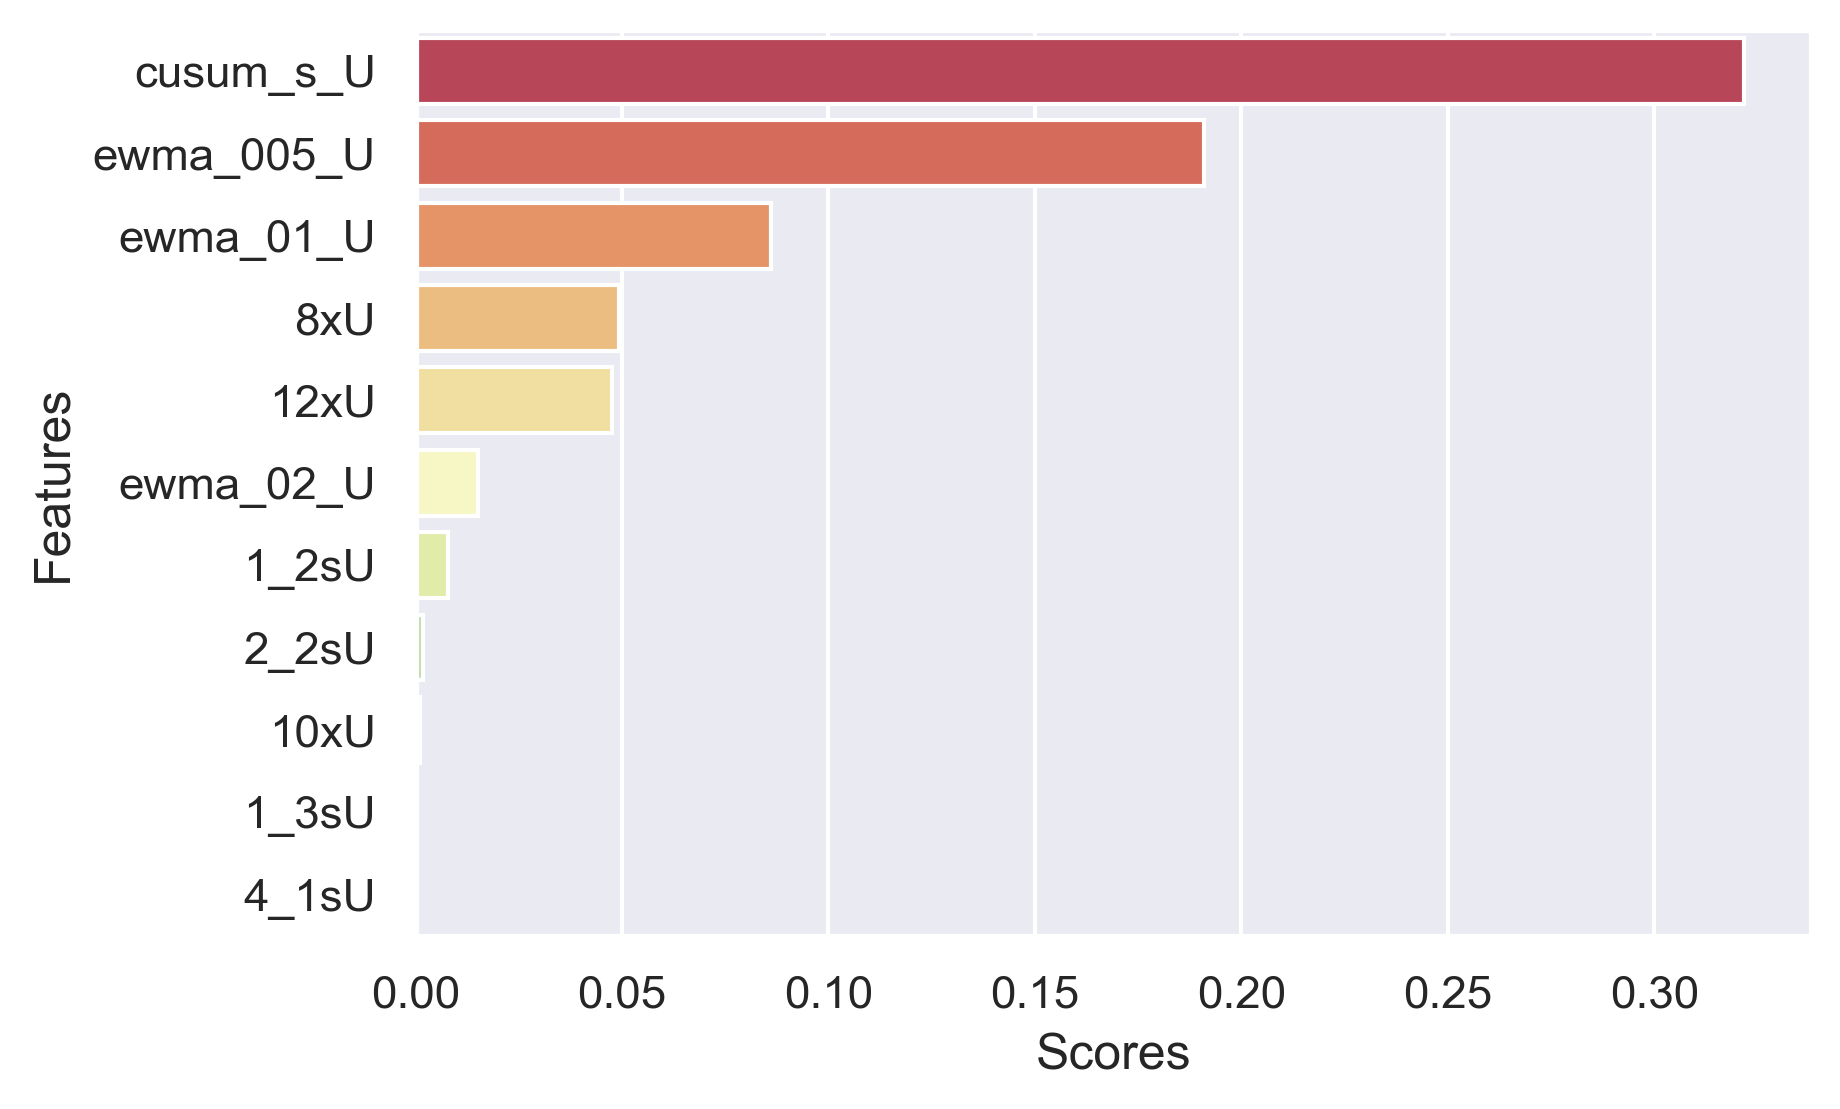

In [39]:
#  Random Forest Classification Feature Importance
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
# get importance
importance = rfc.feature_importances_
score = []
# summarize feature importance
for i,v in enumerate(importance):

    score.append(v)
    
features = ['1_2sU', '1_3sU',  '2_2sU',   
       '4_1sU',  '10xU',  '8xU',  '12xU',
       'ewma_02_U',  'ewma_01_U',  'ewma_005_U',
        'cusum_s_U']

features = pd.DataFrame(features,columns=['Features'])
score = pd.DataFrame(score, columns=['Scores'])
FI_data1= pd.concat([features, score], axis=1)
FI_data1= FI_data1.sort_values(by=['Scores'], ascending=0)

# plot feature importance
ax = sns.barplot(data=FI_data1, x = 'Scores', y = 'Features', orient = 'h',palette="Spectral")


In [151]:
# save model

import os
import joblib

joblib.dump(rfc, r'/Users/hikmetcancubukcu/Desktop/IQCAI_2/random_forest_IQCAI.joblib')

['/Users/hikmetcancubukcu/Desktop/IQCAI_2/random_forest_IQCAI.joblib']

In [177]:
y_rfc_proba = rfc.predict_proba(X_test)
y_rfc_proba[:,1]


array([1.  , 0.07, 0.07, ..., 0.07, 0.07, 0.07])

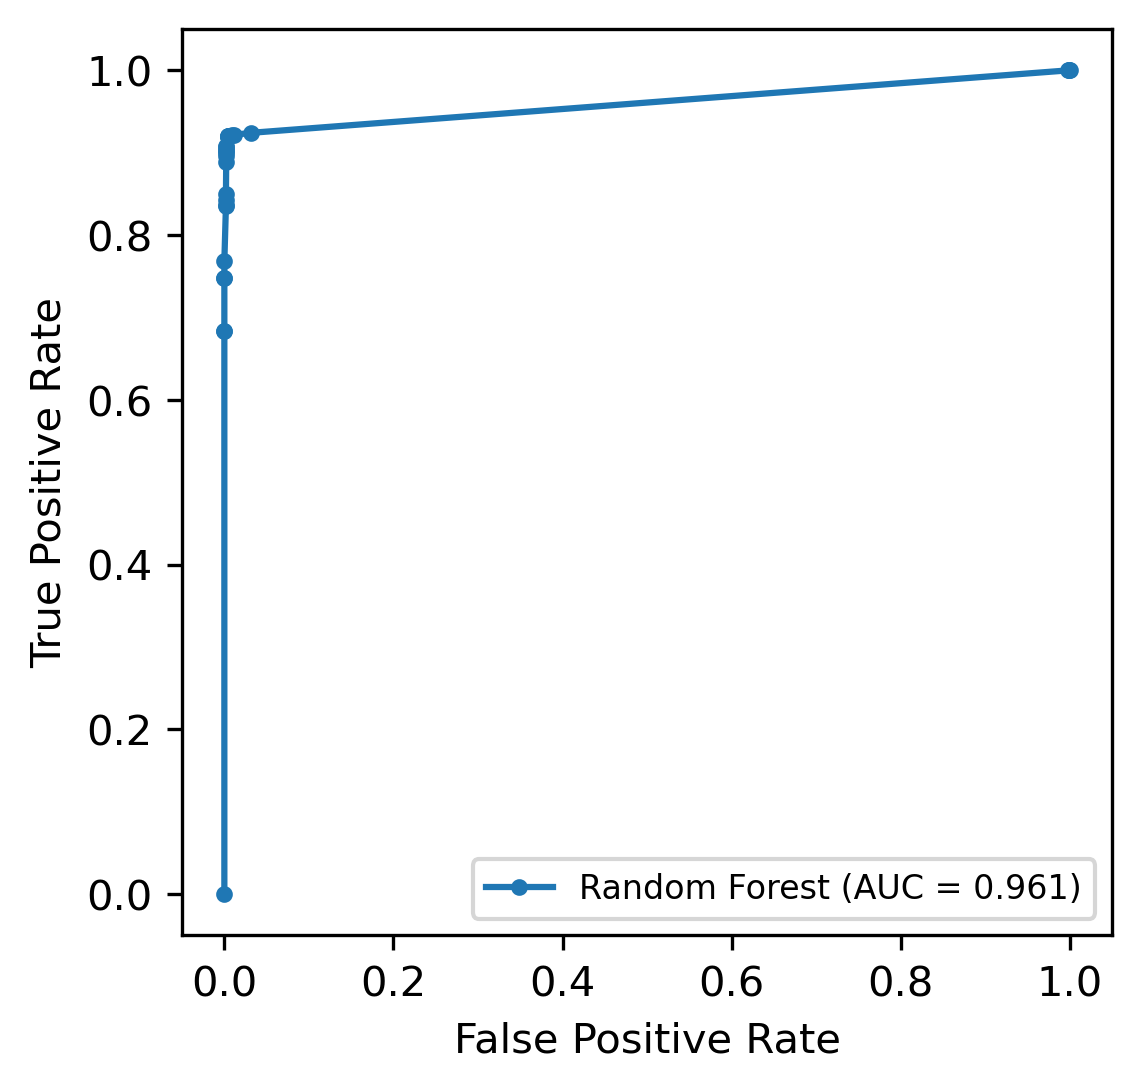

In [178]:
from sklearn.metrics import roc_curve, auc

rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_rfc_proba[:,1]) # rf roc data
auc_rf = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(4, 4), dpi=300)

plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUC = %0.3f)' % auc_rf)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(fontsize=8)

plt.show()

In [170]:
# Youden Index

yhat7 = rfc.predict(X_test)

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,yhat7)

#optimal_idx = np.argmax(tpr - fpr)
#optimal_threshold = thresholds[optimal_idx]

def cutoff_youdens_j(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

cutoff_youdens_j(fpr,tpr,thresholds)


1

In [171]:
optimal_threshold

1

In [193]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,y_rfc_proba[:,1])

In [194]:
def Find_Optimal_Cutoff(tpr, fpr, threshold):
    y = tpr - fpr
    Youden_index = np.argmax(y)  # Only the first occurrence is returned.
    optimal_threshold = threshold[Youden_index]
    point = [fpr[Youden_index], tpr[Youden_index]]
    return optimal_threshold, point

In [195]:
Find_Optimal_Cutoff(tpr, fpr, threshold)

(0.3044345974646872, [0.004693366708385482, 0.9207240948813983])

In [186]:
def ROC(label, y_prob):
    """
    Receiver_Operating_Characteristic, ROC
    :param label: (n, )
    :param y_prob: (n, )
    :return: fpr, tpr, roc_auc, optimal_th, optimal_point
    """
    fpr, tpr, thresholds = metrics.roc_curve(label, y_prob)
    roc_auc = metrics.auc(fpr, tpr)
    optimal_th, optimal_point = Find_Optimal_Cutoff(tpr=tpr, fpr=fpr, threshold=thresholds)
    return fpr, tpr, roc_auc, optimal_th, optimal_point

In [192]:
ROC(y_test, y_rfc_proba[:,1])

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01,
        0.01, 0.01, 0.03, 1.  , 1.  , 1.  , 1.  ]),
 array([0.  , 0.68, 0.68, 0.75, 0.75, 0.77, 0.84, 0.84, 0.84, 0.85, 0.89,
        0.9 , 0.9 , 0.9 , 0.9 , 0.91, 0.91, 0.92, 0.92, 0.92, 0.92, 0.92,
        0.92, 0.92, 0.92, 1.  , 1.  , 1.  , 1.  ]),
 0.960622741207408,
 0.3044345974646872,
 [0.004693366708385482, 0.9207240948813983])

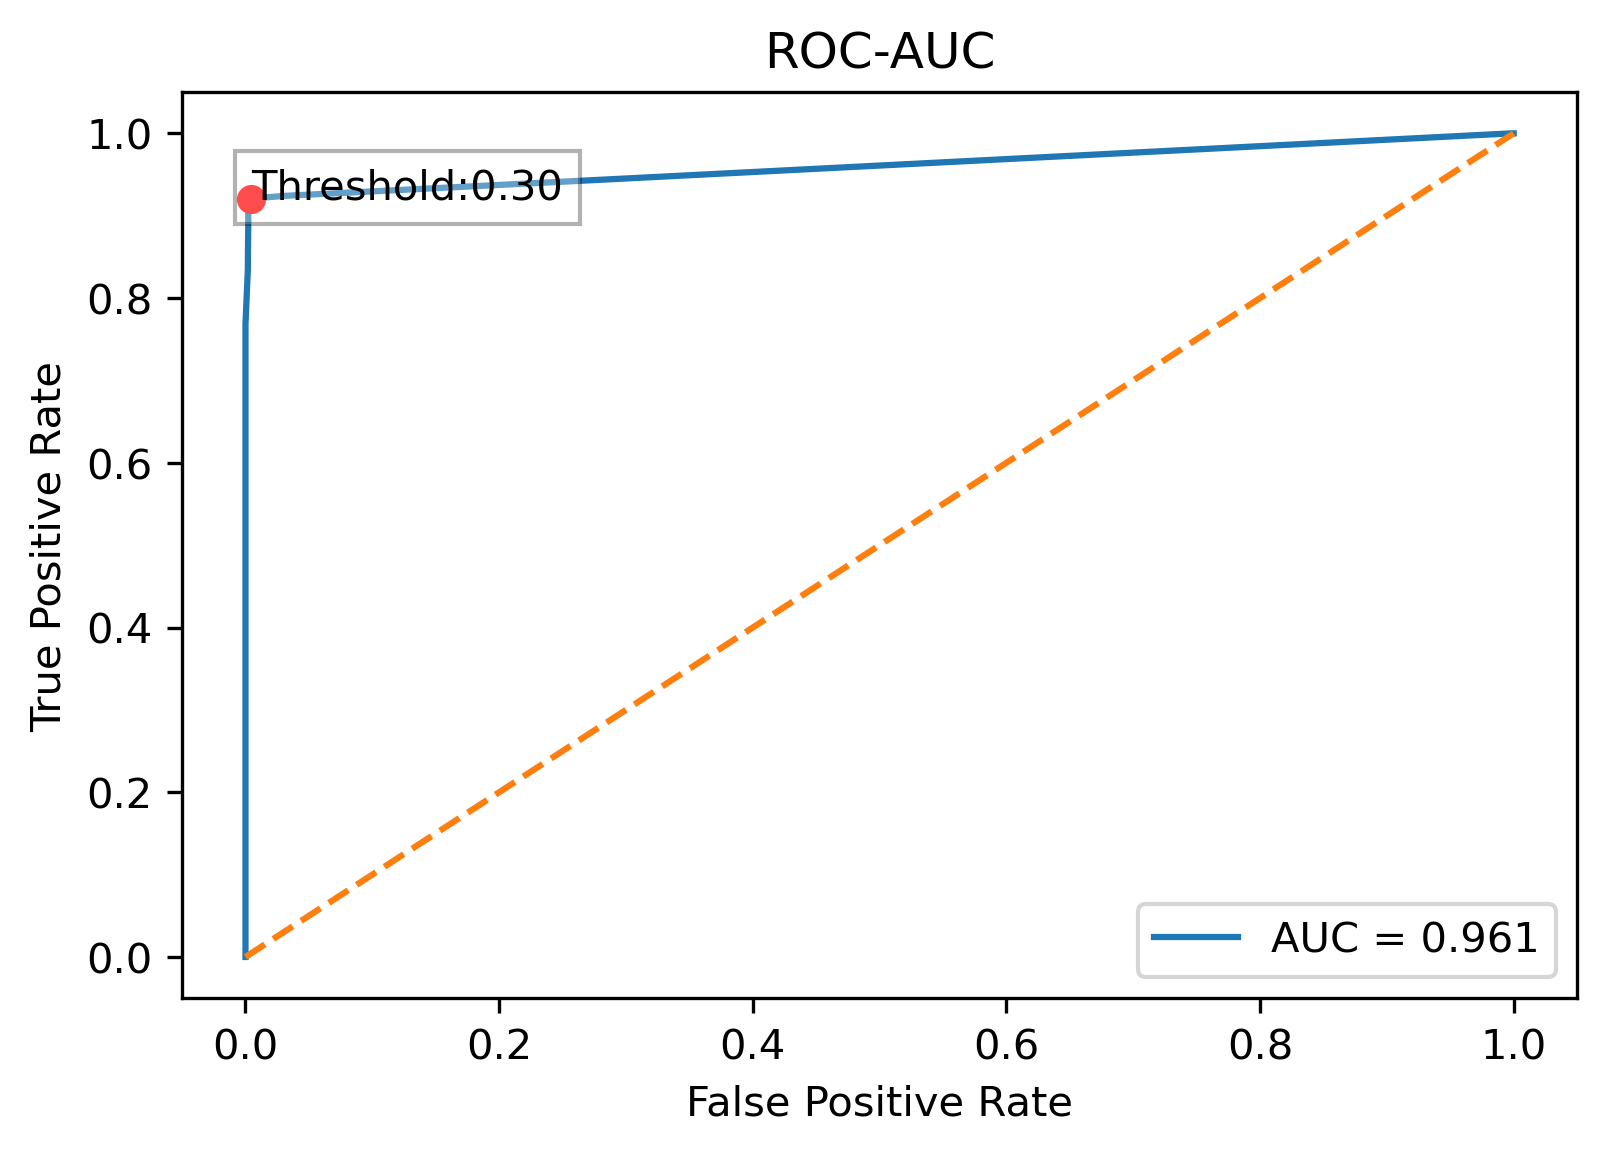

In [218]:
# Youden cutoff on ROC

fpr, tpr, roc_auc, optimal_th, optimal_point = ROC(y_test, y_rfc_proba[:,1])

plt.figure(dpi=300)
#plt.figure(figsize=(4, 4), dpi=300)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}', bbox=dict(facecolor='white', alpha=0.3))
plt.title("ROC-AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()